In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

In [2]:
def test():
    print("Success")

### Adam Candrák/Mária Matušisková - 50%/50%

# Imports

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce

# Phase 1 - Exploratory analysis

## 1.1 Basic description of the data together with characteristics
### EDA with visualization
-------------------------------------------------------------------------------------------
#### Analysis of data structures such as files (structures and relations, number, types, ...), records (structures, number of records, number of attributes, types, ...)


#### *1. Load dataset Devices*

In [4]:
connections_file = "../data/Connections.csv"
devices_file = "../data/Devices.csv"
processes_file = "../data/Processes.csv"
profiles_file = "../data/Profiles.csv"

connections = pd.read_csv(connections_file, sep='\t')
devices = pd.read_csv(devices_file, sep='\t')
processes = pd.read_csv(processes_file, sep='\t')
profiles = pd.read_csv(profiles_file, sep='\t')

- **Devices** - The dataset presents data about mobile or maybe tablet devices, which are stored in the specific locations. The dataset has these attributes:
    - latitude - coordinates that specifies north-south position
    - longitude - coordinates that specifies east-west position
    - store_name - name of the store where is the device
    - code - id specification of the country area where the device is
    - location - From which continent and city the device is
    - imei - International Mobile Equipment Identity - It is a unique number that helps identify device or track it when it is lost. Furthermore, it is preventing from unauthorized network access.

In [5]:
devices.columns

Index(['latitude', 'longitude', 'store_name', 'code', 'location', 'imei'], dtype='object')

The types of the columns:

In [6]:
devices.dtypes

latitude      float64
longitude     float64
store_name     object
code           object
location       object
imei            int64
dtype: object

In this dataset there are 17 478 records.

In [7]:
devices.size

17478

See first rows of the dataset:

In [8]:
devices.head()

,latitude,longitude,store_name,code,location,imei
0,-6.48167,106.85417,Cibinong,ID,Asia/Jakarta,8630330696303481586
1,5.20856,-74.73584,Honda,CO,America/Bogota,8630330696303481735
2,17.54907,82.85749,Elamanchili,IN,Asia/Kolkata,8630330696303482022
3,-8.43333,114.33333,Muncar,ID,Asia/Jakarta,8630330696303481537
4,34.61667,135.60000,Yao,JP,Asia/Tokyo,3590433799317661586


See more info about the dataset... There is a rule that the columns should not have null values.

In [9]:
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2913 non-null   float64
 1   longitude   2913 non-null   float64
 2   store_name  2913 non-null   object 
 3   code        2912 non-null   object 
 4   location    2913 non-null   object 
 5   imei        2913 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 136.7+ KB


Let's see the descriptive statistics for data distribution:
- count - the final number of the non-null values
- mean - the average of the values in the each column
- std - the standard deviation (how spread out the data are)
- min - the smallest value in the each column
- 25% - the value closest to the 25% metric of data
- 50% - the value closest to the 50% metric of data
- 75% - the value closest to the 75% metric of data
- max - the highest value in the each column

In [10]:
devices.describe()

,latitude,longitude,imei
count,2913.000000,2913.000000,2.913000e+03
mean,28.971372,9.448270,3.914803e+18
std,23.529632,73.266773,3.334307e+18
min,-54.800000,-156.474320,3.590434e+17
25%,14.660000,-61.624980,8.630331e+17
50%,36.246240,9.370820,3.590434e+18
75%,46.323130,69.676390,8.630331e+18
max,68.798330,178.004170,8.630331e+18


In [11]:
devices.describe(exclude=np.number)

,store_name,code,location
count,2913,2912,2913
unique,919,132,180
top,Rafiganj,US,America/New_York
freq,12,478,188


Number of rows and columns:

In [12]:
devices.shape

(2913, 6)

#### *3. Analyze Data Structure*

Count elements (distinct)

In [13]:
devices.nunique()

latitude      919
longitude     918
store_name    919
code          132
location      180
imei          498
dtype: int64

-----------------------------------------------------
#### Analysis of individual attributes: for selected significant attributes (min 10), analyze their distributions and basic descriptive statistics.

Summarize the distribution of various usages of apps, while excluding imei and ts, because those are not numerical values.

Text(0.5, 1.0, 'Box Plot of Devices Data')

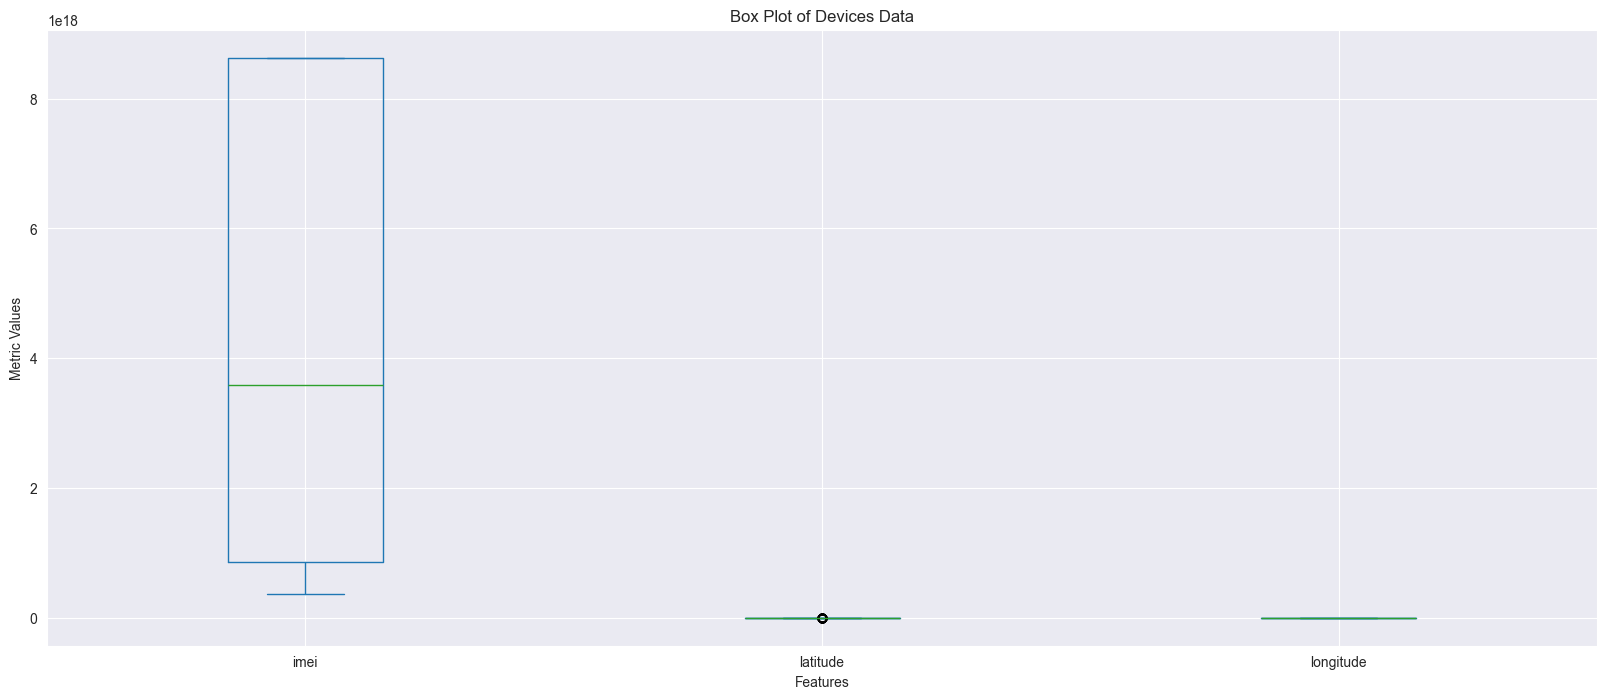

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))

devices[devices.columns.difference(['store_name', 'code', 'location'])].plot.box(ax=ax)

plt.xlabel('Features')
plt.ylabel('Metric Values')
plt.title('Box Plot of Devices Data')

Occurrence of values from the column latitude:

<Axes: ylabel='Frequency'>

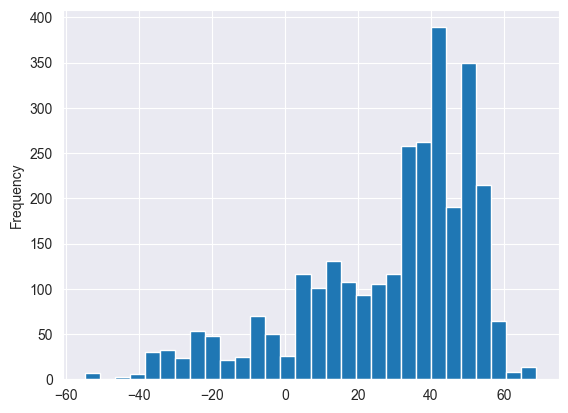

In [15]:
devices['latitude'].plot.hist(bins=30)


Occurrence of values from the column longitude:

<Axes: ylabel='Frequency'>

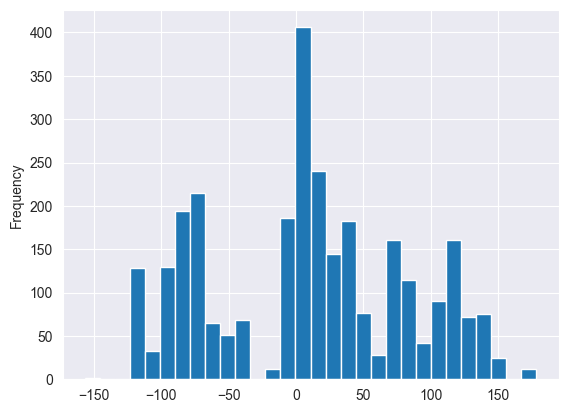

In [16]:
devices['longitude'].plot.hist(bins=30)

Occurrence of values from the column imei:

<Axes: ylabel='Frequency'>

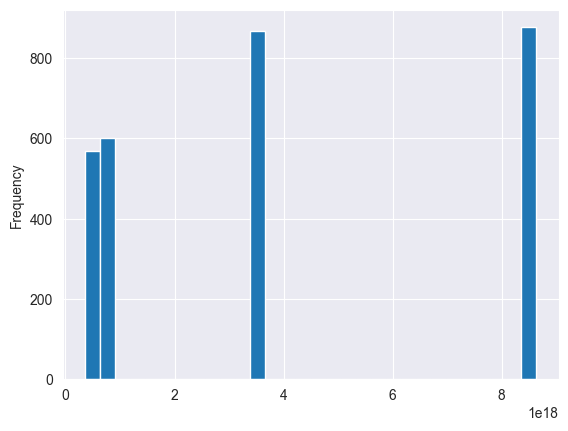

In [17]:
devices['imei'].plot.hist(bins=30)

Data distribution:

Show distribution plot for the latitude column:

<Axes: xlabel='latitude', ylabel='Count'>

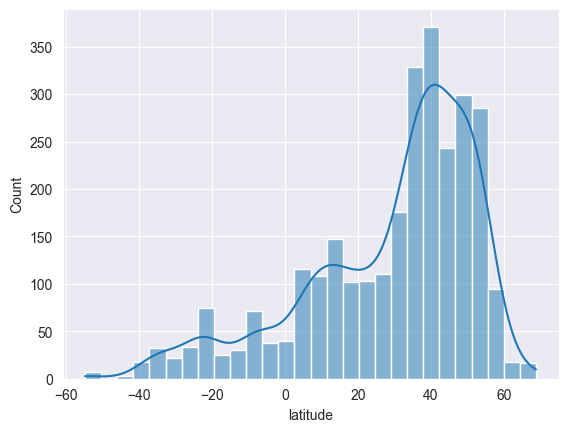

In [18]:
sns.histplot(devices['latitude'], kde=True)

Show distribution plot for the longitude column:

<Axes: xlabel='longitude', ylabel='Count'>

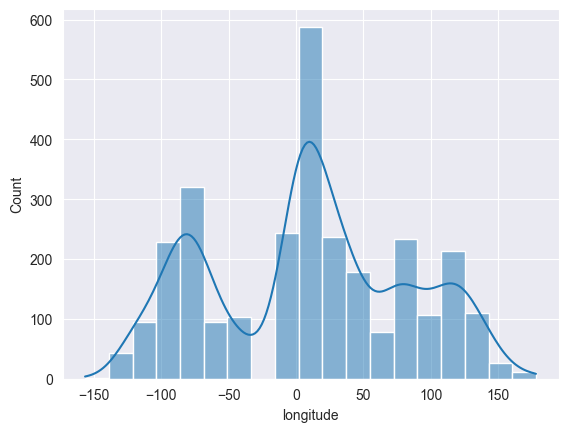

In [19]:
sns.histplot(devices['longitude'], kde=True)

Show distribution plot for the imei column:

<Axes: xlabel='imei', ylabel='Count'>

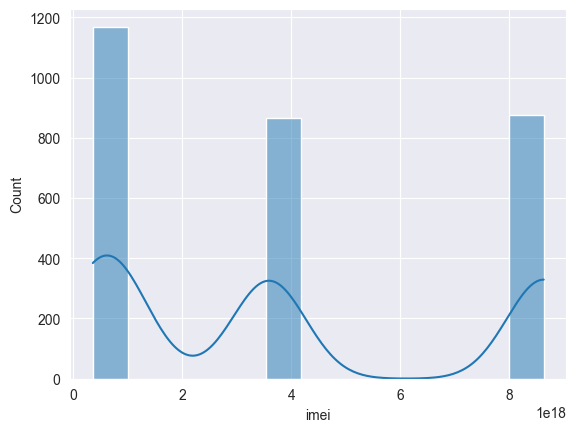

In [20]:
sns.histplot(devices['imei'], kde=True)

---------------------------------------------------
#### Pairwise data analysis: Identify relationships and dependencies between pairs of attributes.

Calculate correlations:

In [21]:
devices_data = devices.drop(columns=['store_name', 'code', 'location'])
devices_data.corr()

,latitude,longitude,imei
latitude,1.000000,-0.059883,-0.005781
longitude,-0.059883,1.000000,-0.006246
imei,-0.005781,-0.006246,1.000000



Bivariate analysis = Pair analysis
To see correlation between two variables/attributes

<Axes: xlabel='latitude', ylabel='longitude'>

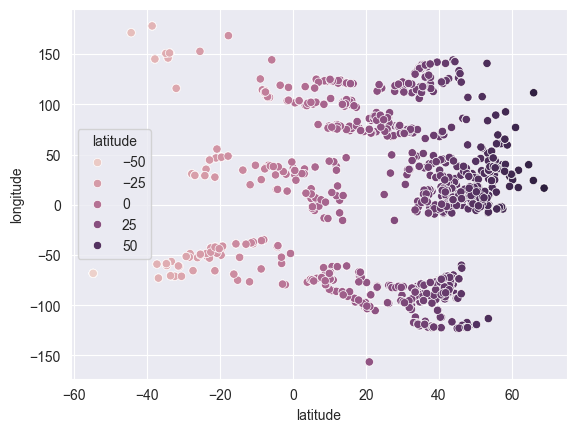

In [34]:
sns.scatterplot(data=devices, x='latitude', y='longitude',  hue='latitude')

Correlation - how strong linear relationship is of the two values

In [35]:
sns.regplot(x="latitude", y="longitude", data=devices)
print("Pearson correlation: %.3f" % devices['latitude'].corr(devices['longitude']))

TypeError: regplot() got an unexpected keyword argument 'hue'

Compare the distribution between columns latitude and longtitude:

<Axes: xlabel='latitude', ylabel='longitude'>

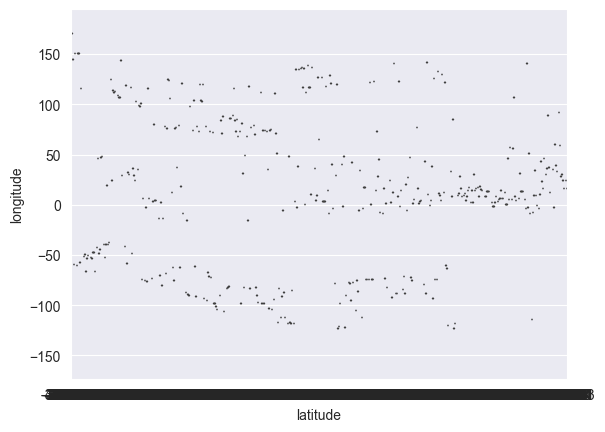

In [24]:
sns.boxplot(x='latitude', y='longitude', data=devices)

Correlation it the table, summary:

In [25]:
devices.corr(numeric_only=True)

,latitude,longitude,imei
latitude,1.000000,-0.059883,-0.005781
longitude,-0.059883,1.000000,-0.006246
imei,-0.005781,-0.006246,1.000000


Show correlations through heatmap to visualize numerical values between columns:

<Axes: >

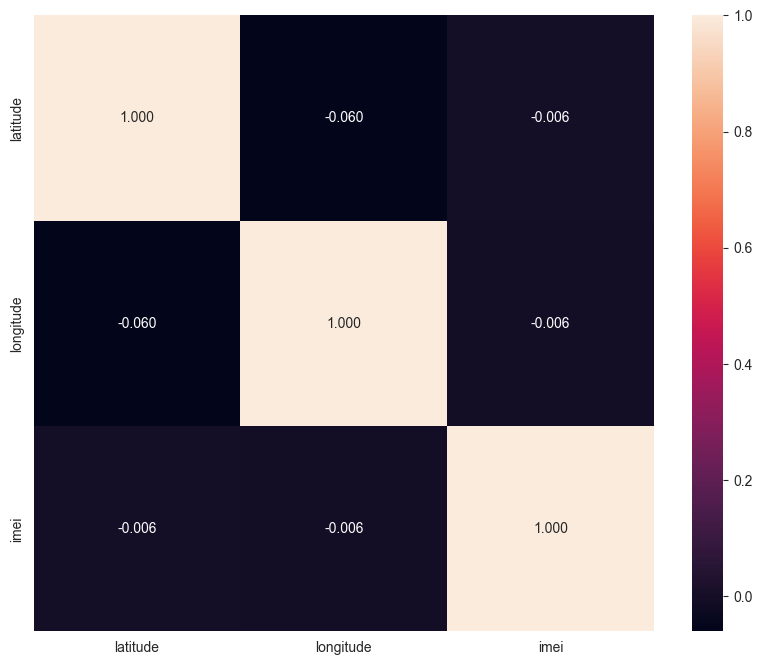

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(devices.corr(numeric_only=True), ax=ax, annot=True, fmt=".3f")

----------
### 1.2 A - Problem identification

In [27]:
devices

,latitude,longitude,store_name,code,location,imei
0,-6.48167,106.85417,Cibinong,ID,Asia/Jakarta,8630330696303481586
1,5.20856,-74.73584,Honda,CO,America/Bogota,8630330696303481735
2,17.54907,82.85749,Elamanchili,IN,Asia/Kolkata,8630330696303482022
3,-8.43333,114.33333,Muncar,ID,Asia/Jakarta,8630330696303481537
4,34.61667,135.60000,Yao,JP,Asia/Tokyo,3590433799317661586
...,...,...,...,...,...,...
2908,-2.90055,-79.00453,Cuenca,EC,America/Guayaquil,3590433799317661503
2909,20.21322,-100.88023,Salvatierra,MX,America/Mexico_City,359043379931766353
2910,30.46907,70.96699,Kot Addu,PK,Asia/Karachi,3590433799317662170
2911,4.88441,101.96857,Gua Musang,MY,Asia/Kuala_Lumpur,3590433799317661396


We can see that the column store_name has a lot of unique values (cardinality). We can try to find out how many unique values are in the column. If the number is too high, we can consider deleting the column in the future.

In [28]:
print(devices['store_name'].nunique())

# calculate cardinality
cardinality = devices['store_name'].nunique() / devices['store_name'].count()
print("Cardinality: ", round(cardinality, 2))

919
Cardinality:  0.32


Let's check and delete duplicates in the dataset:

In [29]:
# check duplicates
duplicates = devices.duplicated()
print(duplicates.sum())

# drop duplicates
devices = devices.drop_duplicates()

8


Now the biggest problem of this dataset is that categorical columns are not encoded. We need to encode them to be able to work with them in the future.

Since we don't know if we are even going to use them let's just encode code column as a show of our (hopefully correct) understanding.

In [30]:
devices['code'].nunique()

132

Let's use binary encoding to encode the column code but first we need to **clear any null values in the column**.

In [31]:
# drop null/nan values
devices = devices.dropna()

In [32]:
encoder = ce.BinaryEncoder(cols=['code'])
devices = encoder.fit_transform(devices)
devices.head()

,latitude,longitude,store_name,code_0,code_1,code_2,code_3,code_4,code_5,code_6,code_7,location,imei
0,-6.48167,106.85417,Cibinong,0,0,0,0,0,0,0,1,Asia/Jakarta,8630330696303481586
1,5.20856,-74.73584,Honda,0,0,0,0,0,0,1,0,America/Bogota,8630330696303481735
2,17.54907,82.85749,Elamanchili,0,0,0,0,0,0,1,1,Asia/Kolkata,8630330696303482022
3,-8.43333,114.33333,Muncar,0,0,0,0,0,0,0,1,Asia/Jakarta,8630330696303481537
4,34.61667,135.60000,Yao,0,0,0,0,0,1,0,0,Asia/Tokyo,3590433799317661586


### 1.2 B and C
We already cleared the only single NaN value from the dataset.
Clearing outliers does not make sense since none of the columns follow a normal distribution and the data is not continuous.